In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import pandas as pd
%matplotlib notebook

<IPython.core.display.Javascript object>


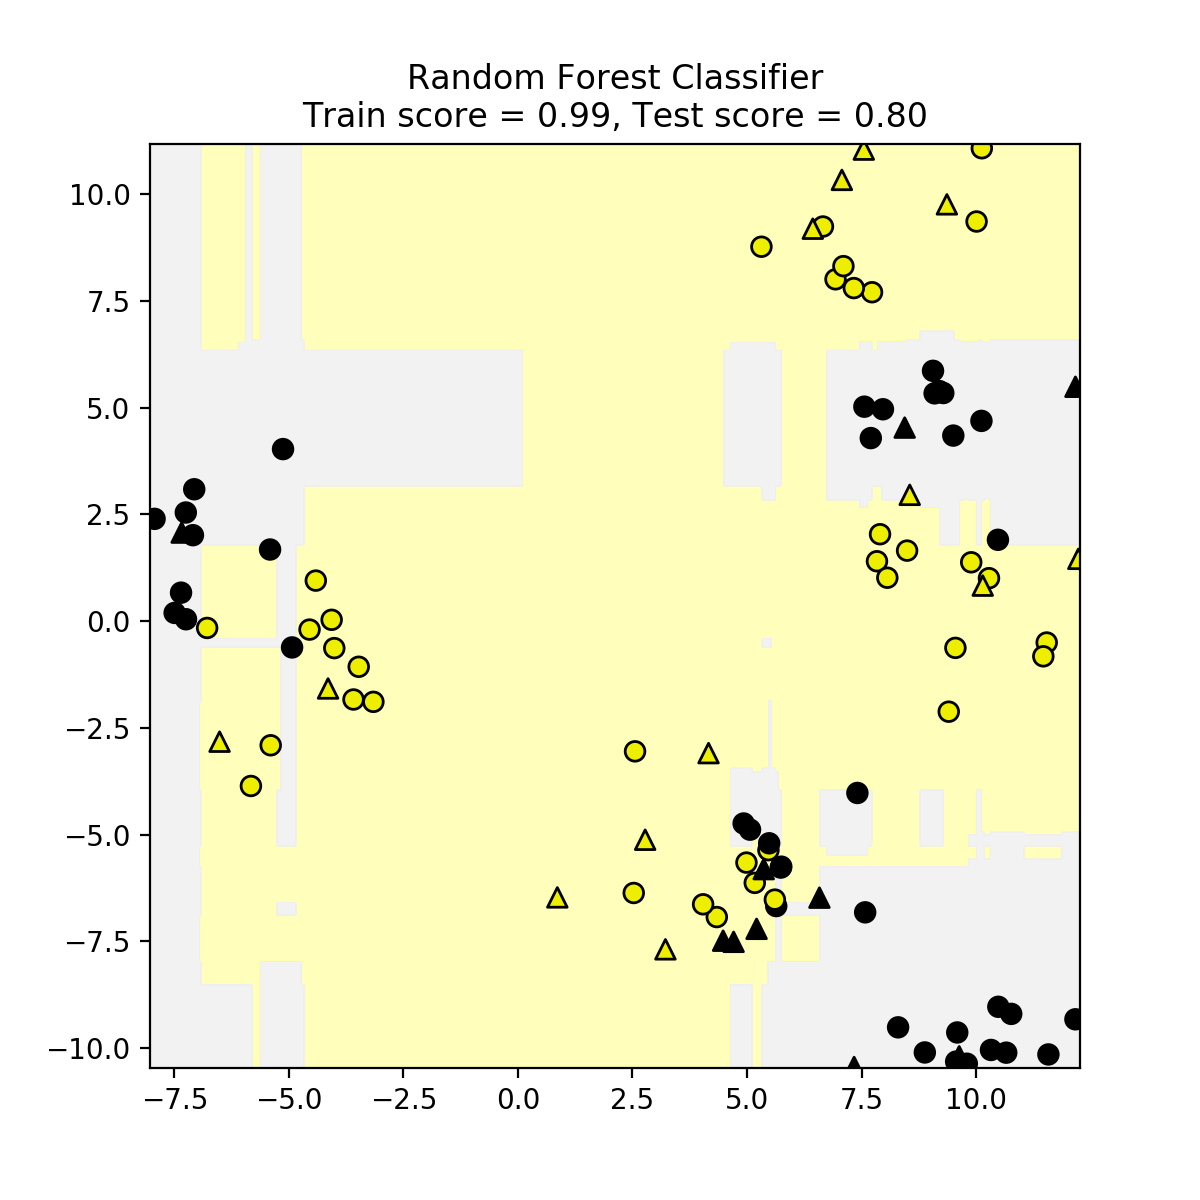

/Users/rtavakoli20/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state = 4)
y_D2 = y_D2 % 2
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

fig, subaxes = plt.subplots(1,1, figsize = (6,6))
clf = RandomForestClassifier().fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, 'Random Forest Classifier', 
                                         subaxes)


### Random Forest: Fruit Dataset

<IPython.core.display.Javascript object>


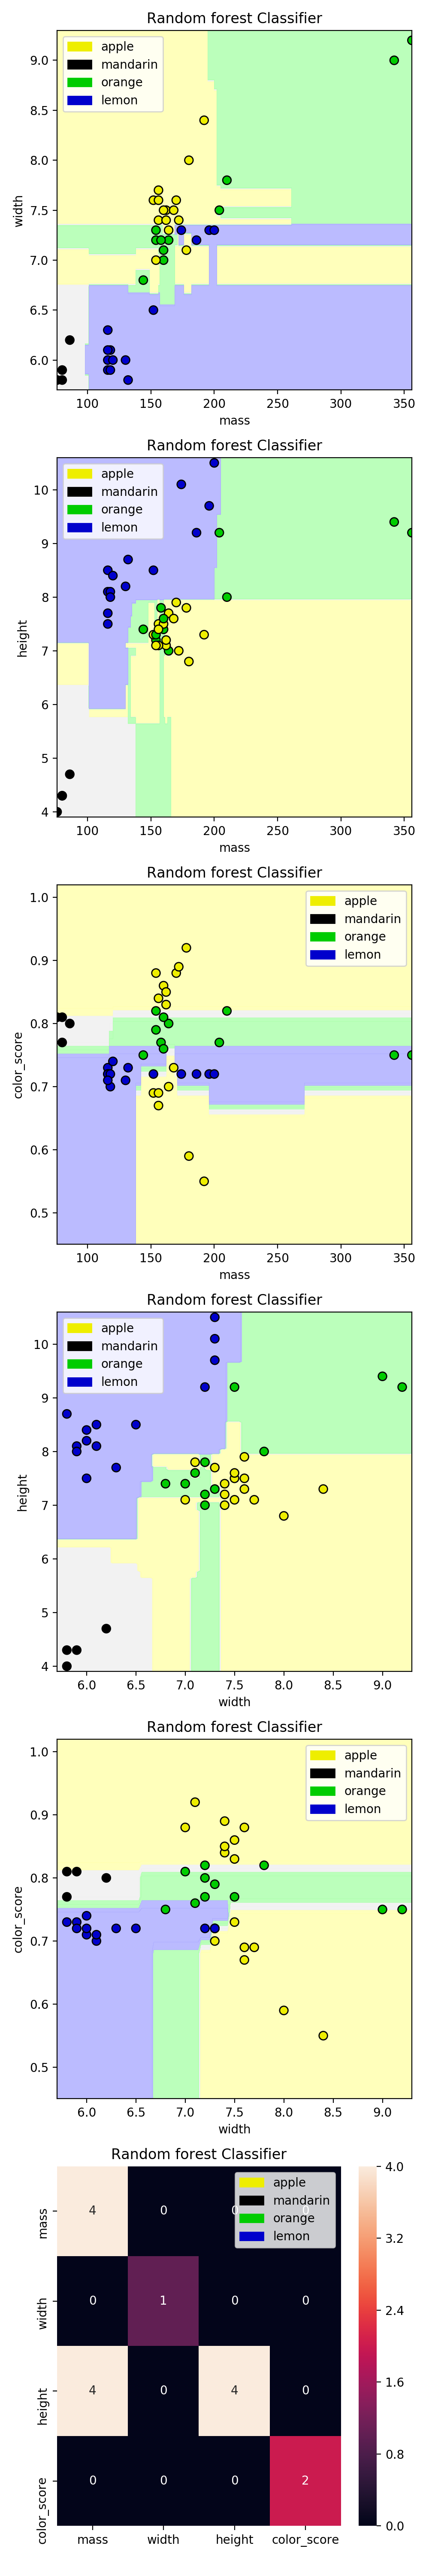

In [47]:
fruit = pd.read_table('fruit_data_with_colors.txt')
fruit_feature_name = ['mass', 'width', 'height', 'color_score']
X_fruit = fruit[fruit_feature_name] 
y_fruit = fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X_fruit.values, y_fruit.values, random_state = 0)
clf_random_forest = RandomForestClassifier(n_estimators=10).fit(X_fruit, y_fruit)

target_name_fruits = ['apple', 'mandarin', 'orange', 'lemon']
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
fig, subaxes = plt.subplots(6,1, figsize = (5,30))

for pair, axis in zip(pair_list, subaxes):
    X_train_2_feature = X_train[:, pair]
    X_test_2_feature = X_test[:, pair]
    clf_random_forest = RandomForestClassifier(n_estimators=10, random_state = 0).fit(X_train_2_feature, y_train)
    plot_class_regions_for_classifier_subplot(clf_random_forest, X_train_2_feature, y_train,
                                             None, None, 'Random forest Classifier', axis, 
                                             target_name_fruits)
    axis.set_xlabel(fruit_feature_name[pair[0]])
    axis.set_ylabel(fruit_feature_name[pair[1]])

plt.tight_layout()
plt.show()

In [73]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix
import seaborn as sns
clf_random_forest = RandomForestClassifier(n_estimators=10, random_state = 0).fit(X_train, y_train)
print('Random forest classifier Score on train set: {:.3}'.format(clf_random_forest.score(X_train, y_train)))
print('Random forest classifier Score on test set: {:.3}'.format(clf_random_forest.score(X_test, y_test)))

clf_random_forest = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
y_prediction = clf_random_forest.predict(X_test)
print(classification_report(y_test, y_prediction))

Random forest classifier Score on train set: 1.0
Random forest classifier Score on test set: 0.867
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.50      1.00      0.67         2

   micro avg       0.80      0.80      0.80        15
   macro avg       0.82      0.91      0.83        15
weighted avg       0.88      0.80      0.80        15



<IPython.core.display.Javascript object>


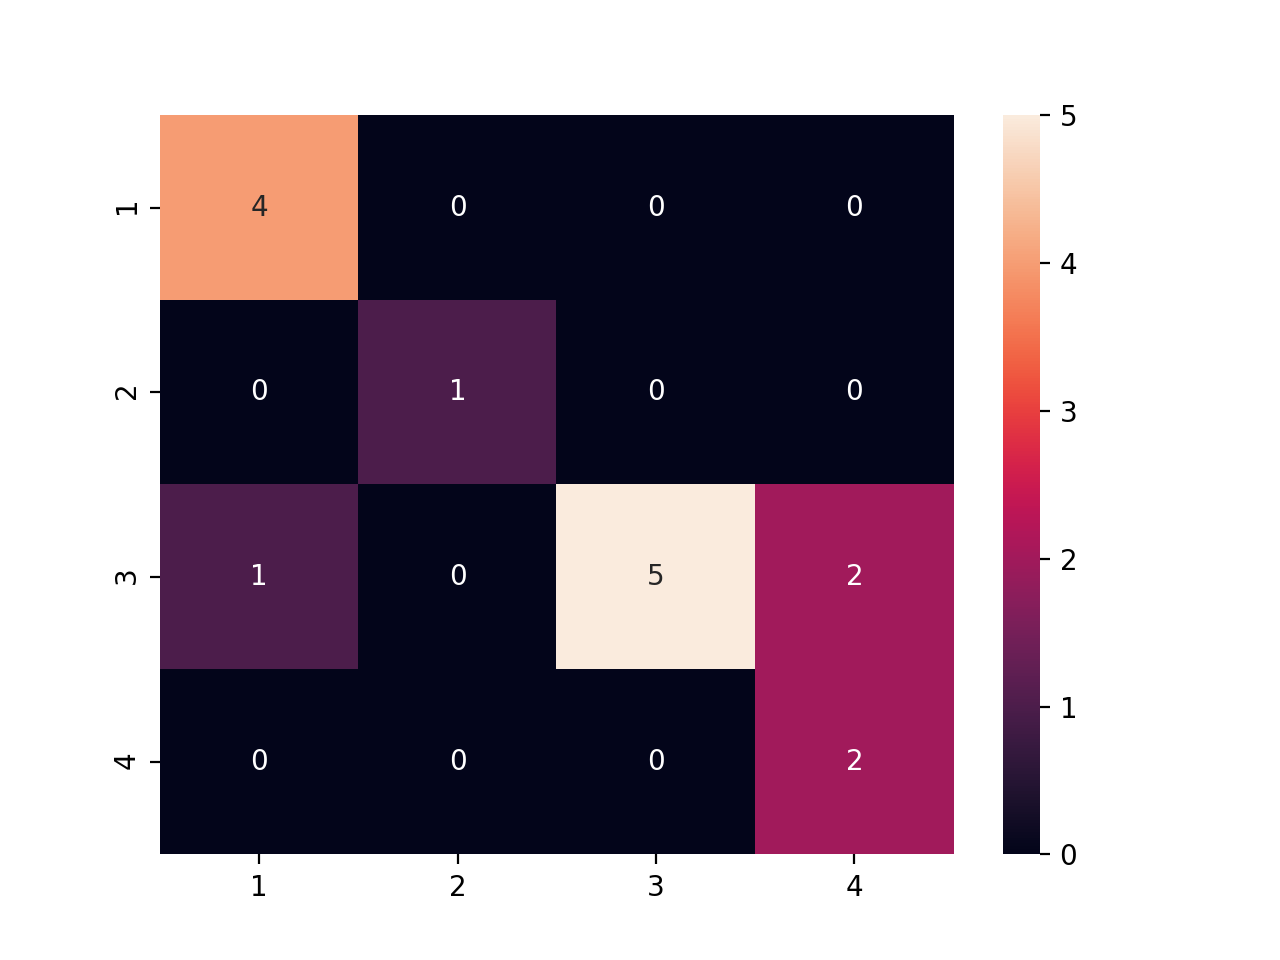

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 5, 2],
       [0, 0, 0, 2]])

In [75]:
%matplotlib notebook
confusion = confusion_matrix(y_test, y_prediction)
df_confusion = pd.DataFrame(confusion, index = [1, 2, 3, 4], columns=[1, 2, 3, 4])
sns.heatmap(df_confusion, annot=True)
confusion